In [10]:
import geopandas as gpd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
main = pd.read_csv('main.csv')

cluster1 = pd.read_csv('cluster1.csv')
shapefile = gpd.read_file('S:/Hackathons/EY/vis/c44c9b96-f570-4ee3-97f1-ebad64efa4c2202044-1-1rb4x6s.8xx6.shp')
district_wise = pd.read_csv('S:/Hackathons/EY/datasets/cases/district_wise.csv')

In [15]:
for i in range(shapefile.shape[0]): shapefile['statename'][i] = shapefile['statename'][i].title()

shapefile['statename'].replace({'Andaman & Nicobar': 'Andaman and Nicobar Islands',  'Dadra & Nagar Have': 'Dadra and Nagar Haveli and Daman and Diu','Daman & Diu' : 'Dadra and Nagar Haveli and Daman and Diu','Jammu & Kashmir' : 'Jammu and Kashmir'}, inplace=True)


shapefile['distname'].replace({'Baramula' : 'Baramulla',
                         'Bandipore' : 'Bandipora',
                         'Badgam' : 'Budgam',
                         'Shupiyan' : 'Shopiyan',
'Sahibzada Ajit Singh Nag*' : 'S.A.S. Nagar',
'Firozpur': 'Ferozepur',
'Lahul & Spiti' : 'Lahaul and Spiti',
'Charki Dadri': 'Charkhi Dadri',
'Central' : 'Central Delhi',
'East' : 'East Delhi',
'North' : 'North Delhi', 
'South West' : 'South West Delhi', 
'South' : 'South Delhi', 
'North East' : 'North East Delhi', 
'West' : 'West Delhi', 
'South East': 'South East Delhi', 
'North West' : 'North West Delhi','Jhunjhunun': 'Jhunjhunu', 
'Jalor' : 'Jalore', 'Chittaurgarh' : 'Chittorgarh', 'Dhaulpur': 'Dholpur','Chota Udaipur': 'Chhota Udaipur', 'Kachchh' : 'Kutch', 'The Dangs' : 'Dang', 'Banas Kantha' : 'Banaskantha', 'Ahmadabad' : 'Ahmedabad', 'Sabar Kantha' : 'Sabarkantha', 'Dohad' : 'Dahod', 'Mahesana' : 'Mehsana', 'Panch Mahals' : 'Panchmahal', 'Faizabad' : 'Ayodhya', 'Kheri' : 'Lakhimpur Kheri', 
'Bara Banki': 'Barabanki', 'Mahrajganj' : 'Maharajganj','Pashchim Champaran': 'West Champaran', 'Mahrajganj' : 'Maharajganj',
'Pashchim Champaran': 'West Champaran', 'Kaimur (bhabua)': 'Kaimur', 'Purba Champaran': 'East Champaran',
'Purbi Singhbhum': 'East Singhbhum', 'Pashchimi Singhbhum': 'West Singhbhum', 'Saraikela-kharsawan': 'Saraikela-Kharsawan', 'Kodarma': 'Koderma',
'Narsimhapur': 'Narsinghpur', 'West Nimar': 'Khargone', 'East Nimar': 'Khandwa',
'Janjgir - Champa' : 'Janjgir Champa','Almora\n': 'Almora','Garhwal': 'Pauri Garhwal', 'Hardwar': 'Haridwar', 
'Darjiling': 'Darjeeling','Maldah' : 'Malda',   'North Twenty Four Pargan*' : 'North 24 Parganas', 
'Medinipur West' : 'Paschim Medinipur', 'Puruliya': 'Purulia','South Twenty Four Pargan*' : 'South 24 Parganas',
'North  District': 'North District','South Salmara Mancachar': 'South Salmara Mankachar','Anugul': 'Angul', 'Jajapur': 'Jajpur',  'Jagatsinghapur' : 'Jagatsinghpur', 'Baleshwar': 'Balasore', 'Baudh': 'Boudh', 
'Debagarh' : 'Deogarh', 'Ahmadnagar' : 'Ahmednagar', 'Gondiya' : 'Gondia', 'Bid' : 'Beed', 'Buldana': 'Buldhana','Jagitial' : 'Jagtial',  'Jayashankar' : 'Jayashankar Bhupalapally',  'Jangoan': 'Jangaon', 'Kumuram Bheem Asifabad' : 'Komaram Bheem',
'Y.S.R.': 'Y.S.R. Kadapa',  'Sri Potti Sriramulu Nell*' : 'S.P.S. Nellore','Bangalore' : 'Bengaluru Urban', 'The Nilgiris': 'Nilgiris', 
'Kanniyakumari' : 'Kanyakumari','North  & Middle Andaman': 'North and Middle Andaman', 'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli'},inplace = True)


In [16]:

def compare(col1,col2):
    col1 = col1.astype(str)
    col2 = col2.astype(str)
    s1 = set(col1) 
    s2 = set(col2)
    return s1.symmetric_difference(s2)



dict_state_code = dict(zip(district_wise['State'].unique(),district_wise['State_Code'].unique()))


shapefile_keys = shapefile[['statename','distname']]
shapefile_keys['state_code'] = shapefile_keys['statename']
shapefile_keys['state_code'].replace(dict_state_code,inplace = True)

shapefile_keys['dist_code'] = shapefile_keys['state_code'] + '_' + shapefile_keys['distname']

compare(shapefile_keys['dist_code'] ,main['District_Key'])

#demo
dist_replace2 = {
 'PB_Fazilka[15]':'PB_Fazilka',
 'TR_Khowai[16]': 'TR_Khowai',
 'TR_Sepahijala[17]':'TR_Sipahijala',
 'TR_Unokoti[18]':'TR_Unokoti',
 'UP_Shamli[19]':'UP_Shamli',
}

shapefile_keys['dist_code'].replace(dist_replace2,inplace = True)

In [18]:
shapefile.head()

,objectid,statecode,statename,state_ut,distcode,distname,st_area(sh,st_length(,countrynam,geometry
0,1,27,Maharashtra,STATE,499,Jalgaon,1.353967e+10,8.464308e+05,India,"POLYGON ((75.23335 21.41481, 75.23469 21.41453..."
1,2,27,Maharashtra,STATE,516,Nashik,1.771358e+10,9.720056e+05,India,"POLYGON ((74.13013 20.86311, 74.13215 20.86160..."
2,3,27,Maharashtra,STATE,509,Chandrapur,1.294532e+10,7.410244e+05,India,"POLYGON ((79.75755 20.73462, 79.76047 20.73463..."
3,4,27,Maharashtra,STATE,510,Yavatmal,1.547940e+10,1.014942e+06,India,"POLYGON ((78.26132 20.69735, 78.26276 20.69717..."
4,5,27,Maharashtra,STATE,511,Nanded,1.186387e+10,1.131732e+06,India,"POLYGON ((78.05387 19.92452, 78.05449 19.92435..."


In [20]:
shapefile_keys.columns = ['state','district','state_key','dist_key']
shapefile_keys.head()

,state,district,state_key,dist_key
0,Maharashtra,Jalgaon,MH,MH_Jalgaon
1,Maharashtra,Nashik,MH,MH_Nashik
2,Maharashtra,Chandrapur,MH,MH_Chandrapur
3,Maharashtra,Yavatmal,MH,MH_Yavatmal
4,Maharashtra,Nanded,MH,MH_Nanded


In [27]:

cluster1.shape

(711, 10)

In [28]:
cluster1.head()

,population_x,Confirmed,Active,Deceased,density,cce_district,ccp_district,cluster,score,dist_key
0,1.580409,1.790055,-0.205516,0.633697,-0.207855,0.459149,1.433042,1,-6.918357,AP_Anantapur
1,1.639006,2.393381,-0.124155,1.008368,-0.188836,0.490623,1.484168,1,-7.472326,AP_Chittoor
2,2.298637,3.645165,-0.114219,0.697174,-0.126830,0.844936,2.059689,1,-16.673109,AP_East Godavari
3,2.122266,2.024876,-0.078775,0.734332,-0.141441,0.750200,1.905807,1,-14.155496,AP_Guntur
4,0.774401,1.382100,-0.212766,0.416945,-0.215749,0.026212,0.729808,3,-9.921846,AP_Y.S.R. Kadapa


In [42]:
cluster1.score.min()

-638.9300075971403

In [26]:
concated = pd.concat([shapefile,shapefile_keys],axis = 1)
concated.shape

(727, 14)

In [45]:
merge = pd.merge(concated,cluster1,on = 'dist_key',how = 'inner')
merge['score1'] =  np.log(merge['score'])
merge.head()

,objectid,statecode,statename,state_ut,distcode,distname,st_area(sh,st_length(,countrynam,geometry,...,population_x,Confirmed,Active,Deceased,density,cce_district,ccp_district,cluster,score,score1
0,1,27,Maharashtra,STATE,499,Jalgaon,1.353967e+10,8.464308e+05,India,"POLYGON ((75.23335 21.41481, 75.23469 21.41453...",...,1.675296,1.405989,-0.109386,1.931111,-0.163034,2.836647,2.496945,1,-9.475086,NaN
1,2,27,Maharashtra,STATE,516,Nashik,1.771358e+10,9.720056e+05,India,"POLYGON ((74.13013 20.86311, 74.13215 20.86160...",...,2.942414,3.277058,0.426581,2.545756,-0.152545,4.555177,4.040189,1,-18.081422,NaN
2,3,27,Maharashtra,STATE,509,Chandrapur,1.294532e+10,7.410244e+05,India,"POLYGON ((79.75755 20.73462, 79.76047 20.73463...",...,0.310303,0.321060,0.003393,0.285346,-0.214533,0.985376,0.834499,3,-0.408299,NaN
3,4,27,Maharashtra,STATE,510,Yavatmal,1.547940e+10,1.014942e+06,India,"POLYGON ((78.26132 20.69735, 78.26276 20.69717...",...,0.701070,0.009089,-0.126034,0.317859,-0.210657,1.515353,1.310420,3,-3.398219,NaN
4,5,27,Maharashtra,STATE,511,Nanded,1.186387e+10,1.131732e+06,India,"POLYGON ((78.05387 19.92452, 78.05449 19.92435...",...,1.091779,0.263437,-0.122812,0.706464,-0.175421,2.045252,1.786270,1,-6.042504,NaN


<AxesSubplot:title={'center':'Covi19 data'}>

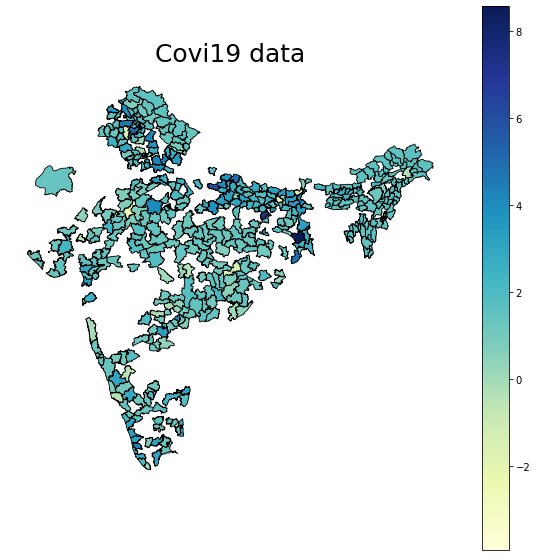

In [47]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Covi19 data', fontdict={'fontsize': '25', 'fontweight' : '10'})

merge.plot(column='score1',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [41]:
import geopandas as gdp
import geoplot as gplt
import geoplot.crs as gcrs

gplt.choropleth(
merge, hue='score1', projection=gcrs.AlbersEqualArea(),
edgecolor='black', linewidth=1, cmap='YlOrRd', legend=True)

ModuleNotFoundError: No module named 'geoplot'

## 12 easy steps to interactive Choropleth Map :

In [61]:

# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import json
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper,ColorBar

from bokeh.palettes import brewer

import json
from bokeh.io import show
from bokeh.io import output_file, save
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          CategoricalColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.io import output_notebook
from bokeh.plotting import figure

In [49]:
#Read data to json
merged_json = json.loads(merge.to_json())
#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)

In [55]:
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

In [59]:
color_mapper = LinearColorMapper(palette = palette, low=merge['score1'].min(), high = merge['score1'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'5000': '>5000'}

In [62]:
#Add hover tool
hover = HoverTool(tooltips = [ ('Deceased','@Deceased'),('cluster','@cluster')])

In [64]:
#Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

In [65]:
#Step-10 : Now create the figure object
p = figure(title = 'Number of Covid-19 cases', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [66]:
#Step-11: Add patches to the figure
#Add patch renderer to figure.
p.patches('xs','ys', source = geosource,fill_color = {'field' :'score1', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'right')

In [68]:
show(p)